In [3]:
## Standard Stuff
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import dask.array as da
import numcodecs

## HEALPix Specific
import healpix as hp
import easygems.healpix as egh
import easygems.remap as egr

import intake     # For catalogs
import zarr

# Ilan
from icecream import ic
import nc_time_axis

def worldmap(var, title='', cbar_title='', **kwargs):
    #projection = ccrs.Robinson(central_longitude=-135.5808361)
    projection = ccrs.Robinson(central_longitude=0)
    fig, ax = plt.subplots(
        figsize=(8, 4), subplot_kw={"projection": projection}, constrained_layout=True
    )
    ax.set_global()
    ax.set_title(title)

    hpshow = egh.healpix_show(var, ax=ax, **kwargs)
    cbar = plt.colorbar(hpshow, ax=ax, orientation='vertical', 
                    pad=0.05, shrink=0.8, label=cbar_title)
    ax.add_feature(cf.COASTLINE, linewidth=0.8)
    ax.add_feature(cf.BORDERS, linewidth=0.4)
    
def usmap(var, title='', cbar_title='', **kwargs):
    #projection = ccrs.Robinson(central_longitude=-135.5808361)
    #projection = ccrs.Robinson(central_longitude=-90)
    projection = ccrs.PlateCarree()
    fig, ax = plt.subplots(
        figsize=(8, 4), subplot_kw={"projection": projection}, constrained_layout=True
    )
    ax.set_extent([-130, -60, 20, 45])
    
    hpshow = egh.healpix_show(var, ax=ax, **kwargs)
    cbar = plt.colorbar(hpshow, ax=ax, orientation='vertical', 
                    pad=0.05, shrink=0.8, label=cbar_title)
    ax.set_title(title)
    ax.add_feature(cf.COASTLINE, linewidth=0.8)
    #ax.coastlines(linewidth=0.8)
    ax.add_feature(cf.BORDERS, linewidth=0.4)
    ax.add_feature(cf.STATES, linewidth=0.4)

In [4]:
# set up dask
from dask.distributed import Client, LocalCluster
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()
# cluster = LocalCluster()
# client = Client(cluster)
# client

[########################################] | 100% Completed | 102.23 ms
[########################################] | 100% Completed | 307.71 ms
[########################################] | 100% Completed | 306.99 ms
[########################################] | 100% Completed | 102.63 ms
[########################################] | 100% Completed | 102.90 ms
[########################################] | 100% Completed | 103.16 ms


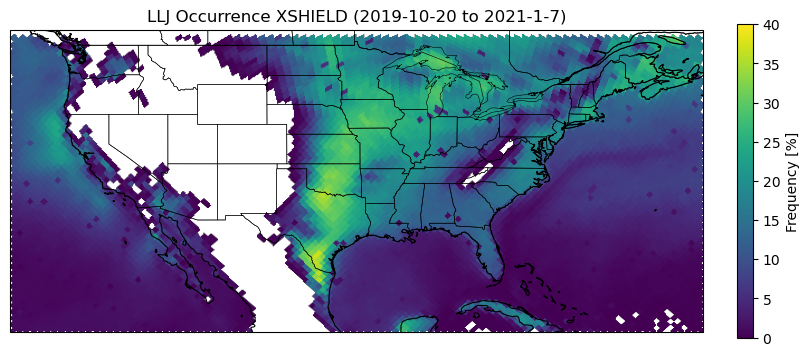

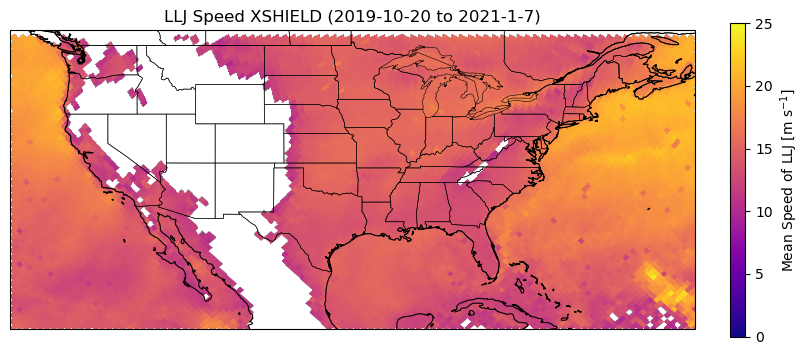

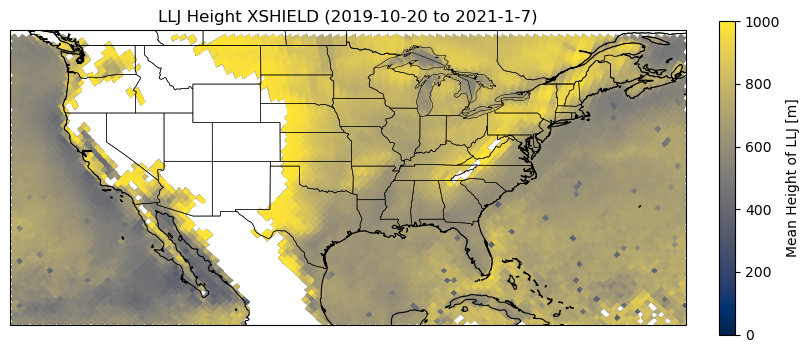

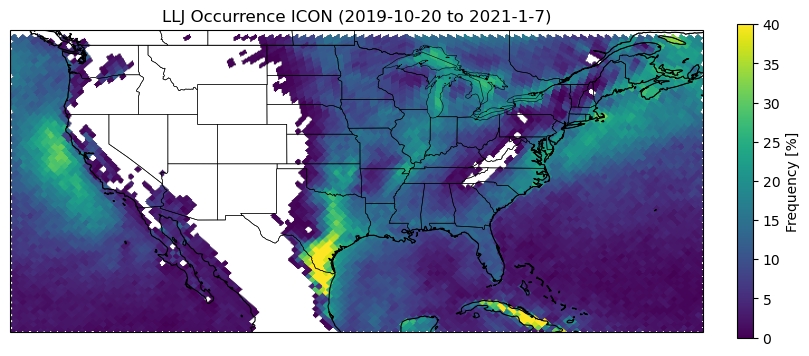

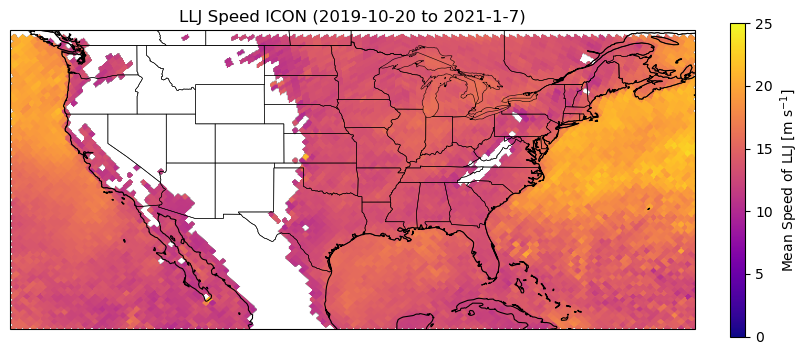

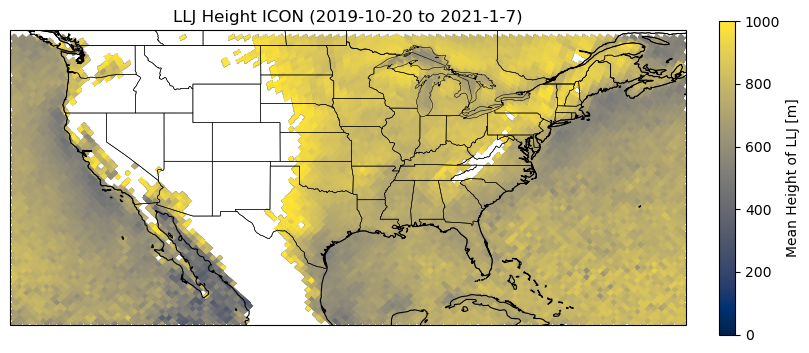

In [6]:
for name in ['XSHIELD', 'ICON']:
    llj = xr.open_dataset(f'/scratch/cimes/iv4111/hk25-data/llj_{name}.h5', chunks='auto')
    freq = llj.mask.sum('time')/len(llj.time)*100
    freq = freq.where(freq>0, np.nan)
    title = f'{name} (2019-10-20 to 2021-1-7)'
    usmap(freq, title=f'LLJ Occurrence {title}', cbar_title='Frequency [%]', vmin=0, vmax=40)
    # Speed
    usmap(llj.speed.mean('time'), title=f'LLJ Speed {title}', cbar_title=r'Mean Speed of LLJ [m s$^{-1}$]', vmin=0, vmax=25, cmap='plasma')
    # Jet height
    usmap(llj.height.mean('time'), title=f'LLJ Height {title}', cbar_title=r'Mean Height of LLJ [m]', vmin=0, vmax=1000, cmap='cividis')

In [15]:
print(len(xsh.time))
print(len(icon.time))

3560
425


[########################################] | 100% Completed | 100.87 ms
[########################################] | 100% Completed | 100.65 ms
[########################################] | 100% Completed | 100.58 ms
[########################################] | 100% Completed | 100.60 ms
[########################################] | 100% Completed | 102.58 ms


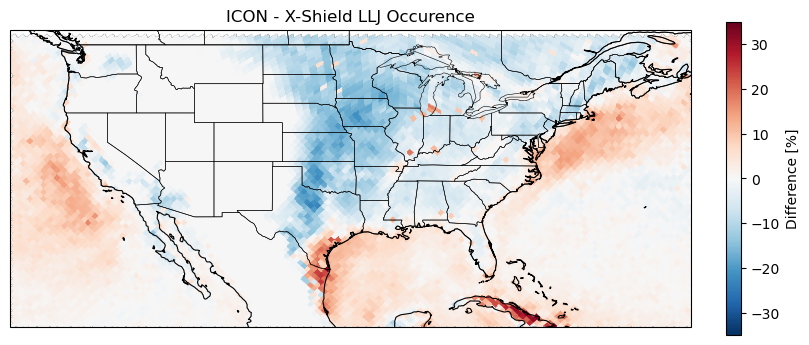

In [14]:
xsh = xr.open_dataset(f'/scratch/cimes/iv4111/hk25-data/llj_XSHIELD.h5', chunks='auto')
icon = xr.open_dataset(f'/scratch/cimes/iv4111/hk25-data/llj_ICON.h5', chunks='auto')
xsh_freq = xsh.mask.sum('time')/len(xsh.time)*100
icon_freq = icon.mask.sum('time')/len(icon.time)*100
diff = icon_freq - xsh_freq
usmap(diff, title=f'ICON - X-Shield LLJ Occurence', cbar_title=r'Difference [%]', vmax=35, vmin=-35, cmap='RdBu_r')

[########################################] | 100% Completed | 100.68 ms
[########################################] | 100% Completed | 100.64 ms
[########################################] | 100% Completed | 100.60 ms
[########################################] | 100% Completed | 100.60 ms
[########################################] | 100% Completed | 100.71 ms
[########################################] | 100% Completed | 100.62 ms
[########################################] | 100% Completed | 100.57 ms
[########################################] | 100% Completed | 100.60 ms
[########################################] | 100% Completed | 307.23 ms
[########################################] | 100% Completed | 307.33 ms


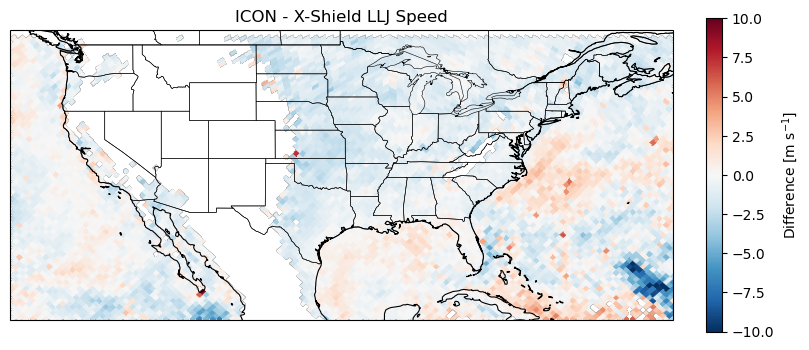

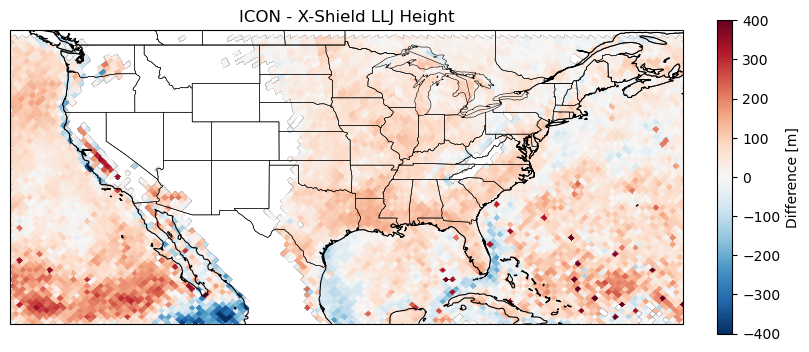

In [13]:
speed_diff = icon.speed.mean('time') - xsh.speed.mean('time')
height_diff = icon.height.mean('time') - xsh.height.mean('time')
usmap(speed_diff, title=f'ICON - X-Shield LLJ Speed', cbar_title=r'Difference [m s$^{-1}$]', vmin=-10, vmax=10, cmap='RdBu_r')
usmap(height_diff, title=f'ICON - X-Shield LLJ Height', cbar_title=r'Difference [m]', vmin=-400, vmax=400, cmap='RdBu_r')